In [3]:
import numpy as np
import pandas as pd
import GPy
import time
import sys
import os
import pdb
import matplotlib.pyplot as plt

from context import aep
from context import load_data
from context import delete_blocks
from context import start_df
from context import save_df
from context import metrics
from thesis_work.plots import GP_figures
from thesis_work.plots import SGP_figures
from thesis_work.plots import DGP_figures

from baseline_models import full_GP_reg
from baseline_models import sparse_GP_reg
from aep_config import cont_optimization
from aep_config import aep_DGP_reg

default_dict = {'M': 30, 'hidden_size': [2], 
			'optimizer':'adam', 'max_it':100,
            'MB': 250, 'lr': 0.01, 'fixed_hyp': []}
os.getcwd()
%matplotlib notebook

# Load data: normalise, delete blocks

Dataset size:  2500  Test size:  1000.0
Training:  750


<IPython.core.display.Javascript object>


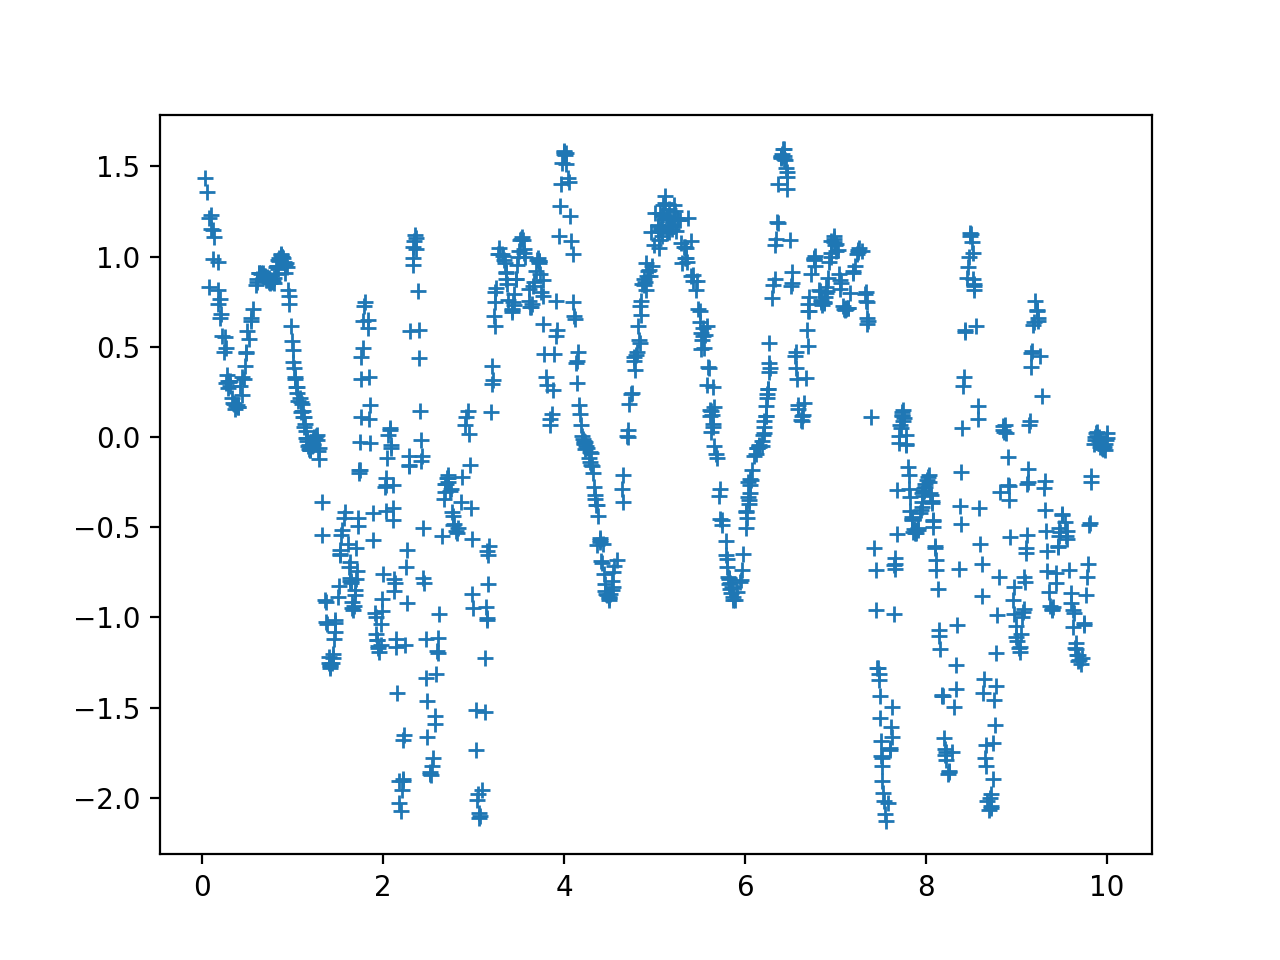

In [4]:
path = 'data/sample_3.txt'
X_train, y_train, X_test, y_test = load_data(path, N_train=750, test=0.4, norm_out=False)
# X_test, y_test = delete_blocks(X_test, y_test,
#                                intervals=[2,4,8,9])
plt.figure()
plt.plot(X_test, y_test, '+')
plt.show()

# Baseline models

create full GP model and optimize ...
Test MSE =0.004, NLL =-1.321


<IPython.core.display.Javascript object>


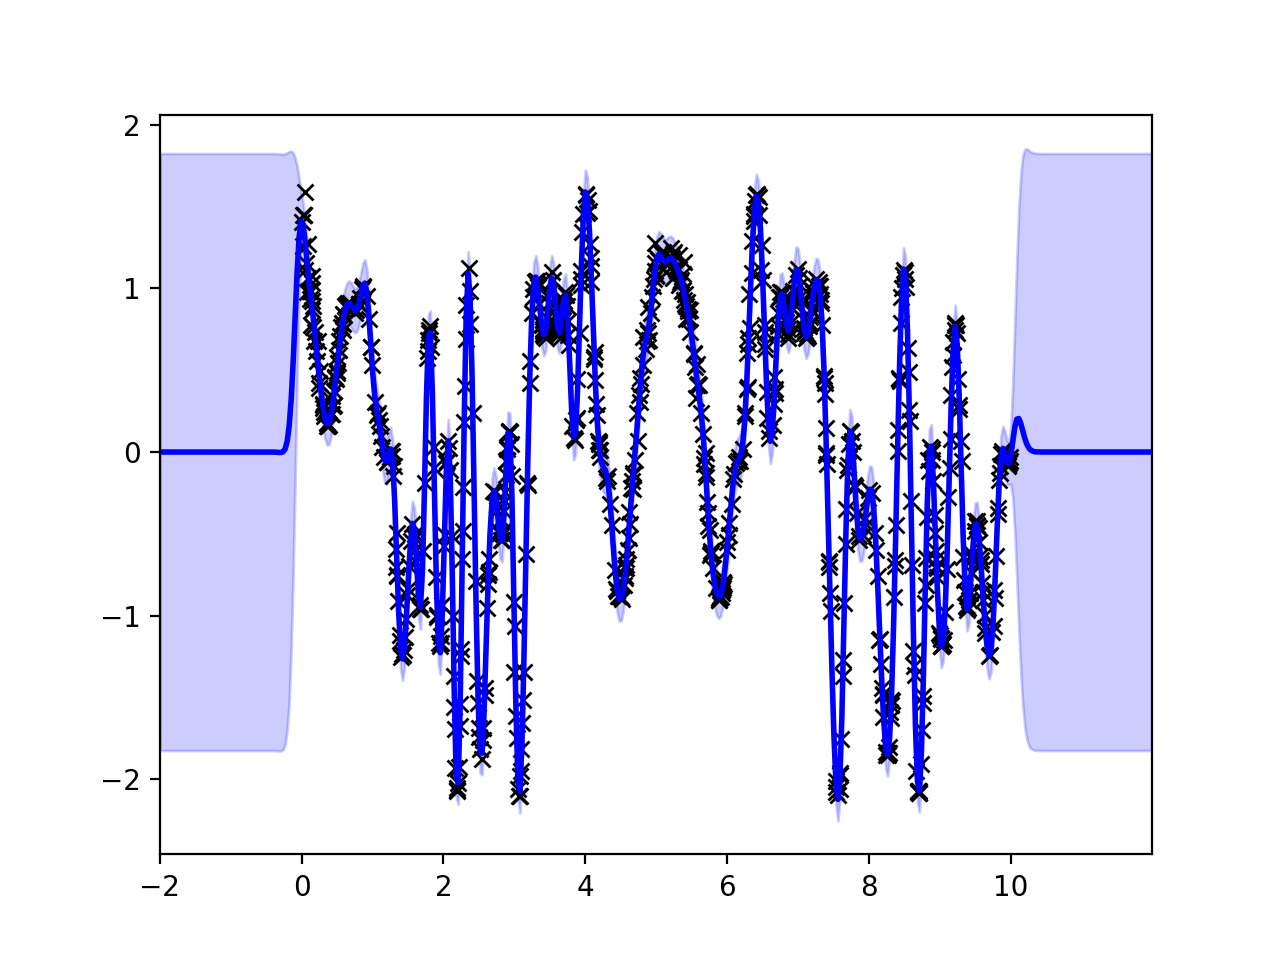

In [5]:
model_gp, df = full_GP_reg(X_train, y_train, X_test, y_test)
fig = GP_figures(model_gp).plot()

In [6]:
# fig.savefig('../fig.png')
# save_df('../', df, name='scores')

## Sparse GP

create SGP model and optimize ...
Test MSE =0.043, NLL =0.046


<IPython.core.display.Javascript object>


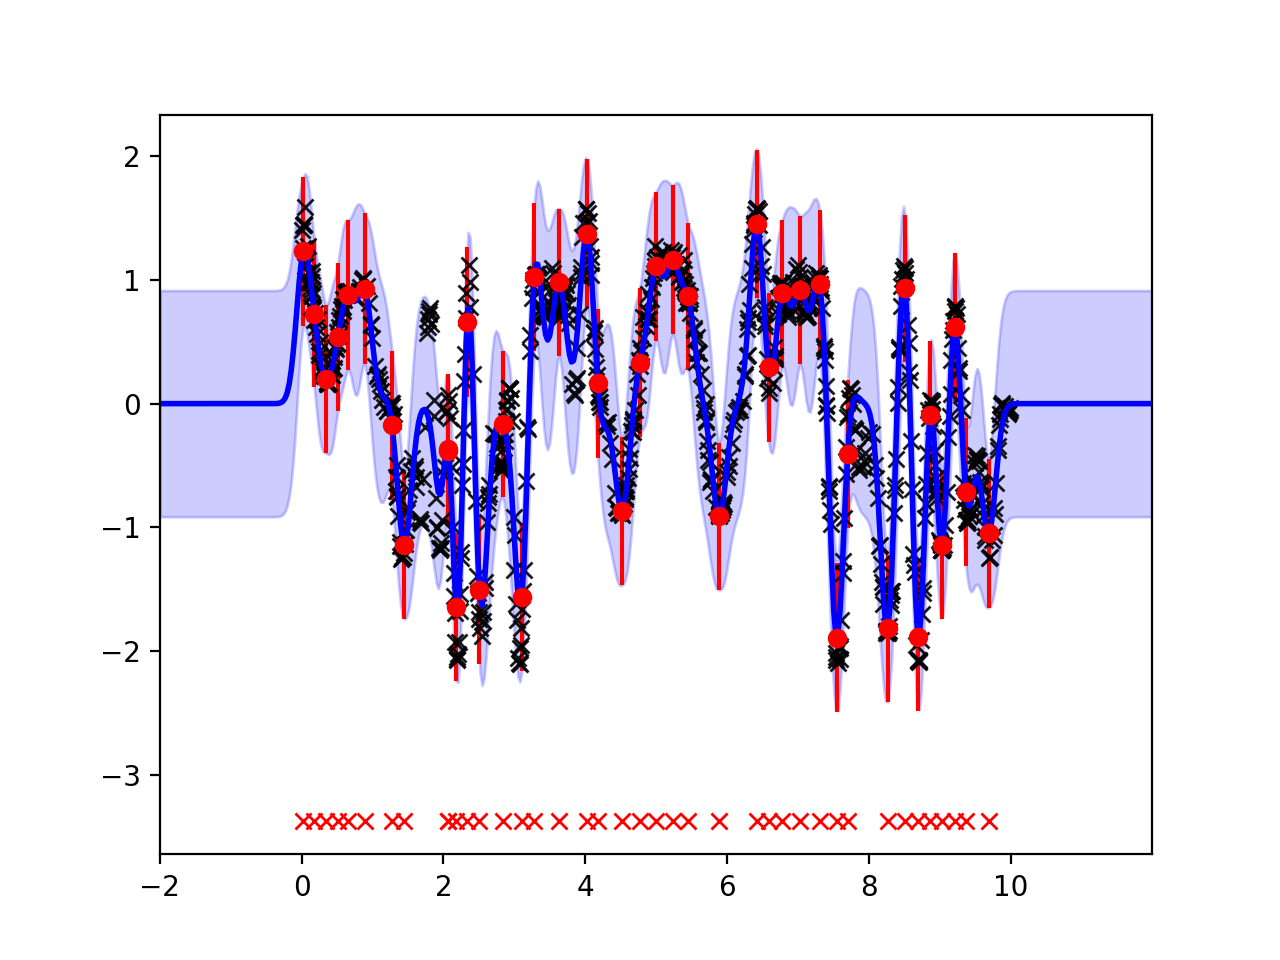

In [7]:
model_sgp, df = sparse_GP_reg(X_train, y_train, X_test, y_test, M=40)
fig = SGP_figures(model_sgp).plot()

# AEP Deep GPs

Create DGP model and optimize ...
Optimise with fixed:  []
Default initialisation
iter 0 	 obj 18.497
iter 50 	 obj 4.788
iter 100 	 obj 4.073
iter 150 	 obj 3.282
iter 200 	 obj 2.502
iter 250 	 obj 2.055
iter 300 	 obj 1.414
iter 350 	 obj 1.041
iter 400 	 obj 1.132
iter 450 	 obj 0.913
iter 500 	 obj 0.932
iter 550 	 obj 0.866
iter 600 	 obj 0.986
iter 650 	 obj 0.826
iter 700 	 obj 0.846
iter 750 	 obj 0.866
iter 800 	 obj 0.841
iter 850 	 obj 0.859
iter 900 	 obj 0.821
iter 950 	 obj 0.815
Test MSE= 0.226, NLL= 0.503, SN= 0.363


<IPython.core.display.Javascript object>


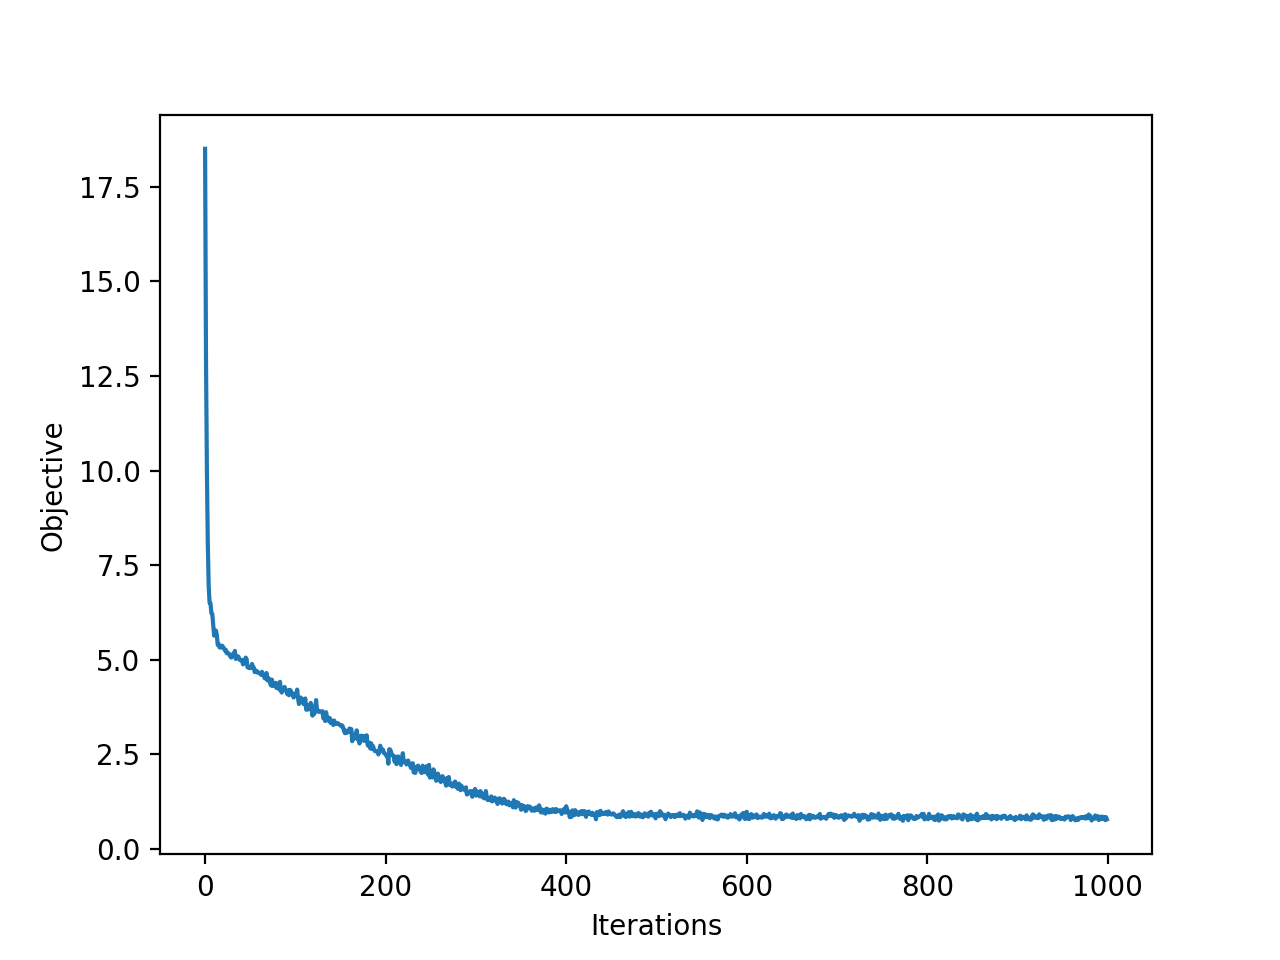

In [9]:
N_train = X_train.shape[0]
config_dict = {'M': 40, 'hidden_size': [2], 
			'optimizer':'adam', 'max_it':1000,
            'MB': 250, 'lr': 0.01, 'fixed_hyp': [], 'init_type': True}

model, df, costs = aep_DGP_reg(X_train, y_train, X_test, y_test, 
				conf_dict= config_dict,
				return_cost=True)
fig0 = DGP_figures(model,conf_dict=config_dict).plot_cost(costs)

In [10]:
config_dict['optimizer'] = 'adam'
model, df = cont_optimization(model, X_test, y_test, conf_dict=config_dict,
                              new_max_it=1000, return_cost=False)

iter 0 	 obj 0.898
iter 50 	 obj 0.818
iter 100 	 obj 0.798
iter 150 	 obj 0.831
iter 200 	 obj 0.694
iter 250 	 obj 0.733
iter 300 	 obj 0.698
iter 350 	 obj 0.692
iter 400 	 obj 0.582
iter 450 	 obj 0.660
iter 500 	 obj 0.606
iter 550 	 obj 0.605
iter 600 	 obj 0.524
iter 650 	 obj 0.513
iter 700 	 obj 0.573
iter 750 	 obj 0.507
iter 800 	 obj 0.481
iter 850 	 obj 0.488
iter 900 	 obj 0.483
iter 950 	 obj 0.474
Test MSE= 0.127, NLL= -0.014, SN= 0.194


In [9]:
print dir(DGP_figures)

['__class__', '__delattr__', '__dict__', '__doc__', '__format__', '__getattribute__', '__hash__', '__init__', '__module__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'h_out', 'h_out2', 'in_h', 'in_out', 'plot', 'plot_cost', 'plot_h_out', 'plot_hidden', 'plot_in_h', 'plot_init', 'plot_sample']


### Fitting plots

<IPython.core.display.Javascript object>


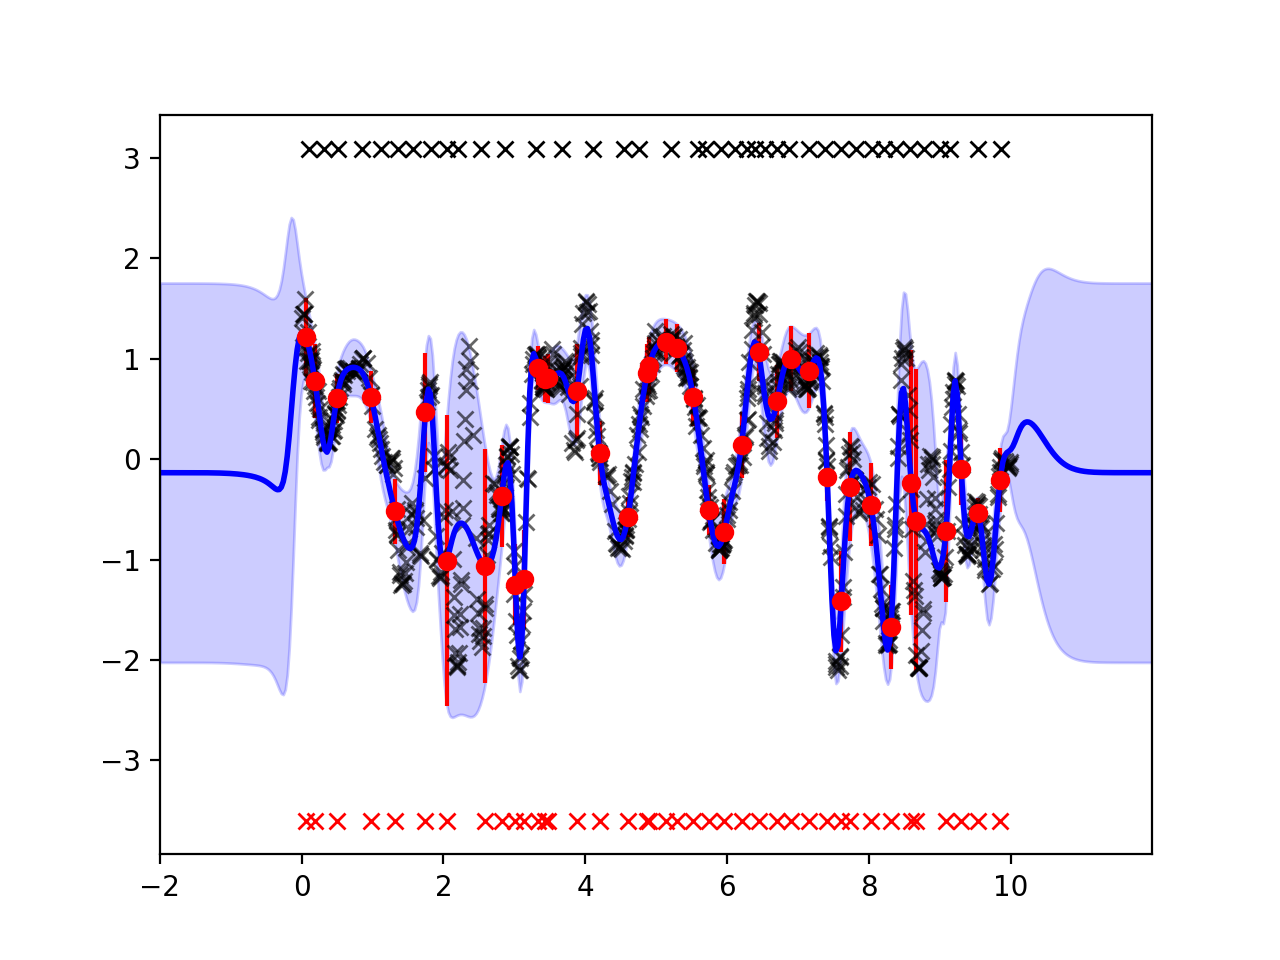

Default initialisation


<IPython.core.display.Javascript object>


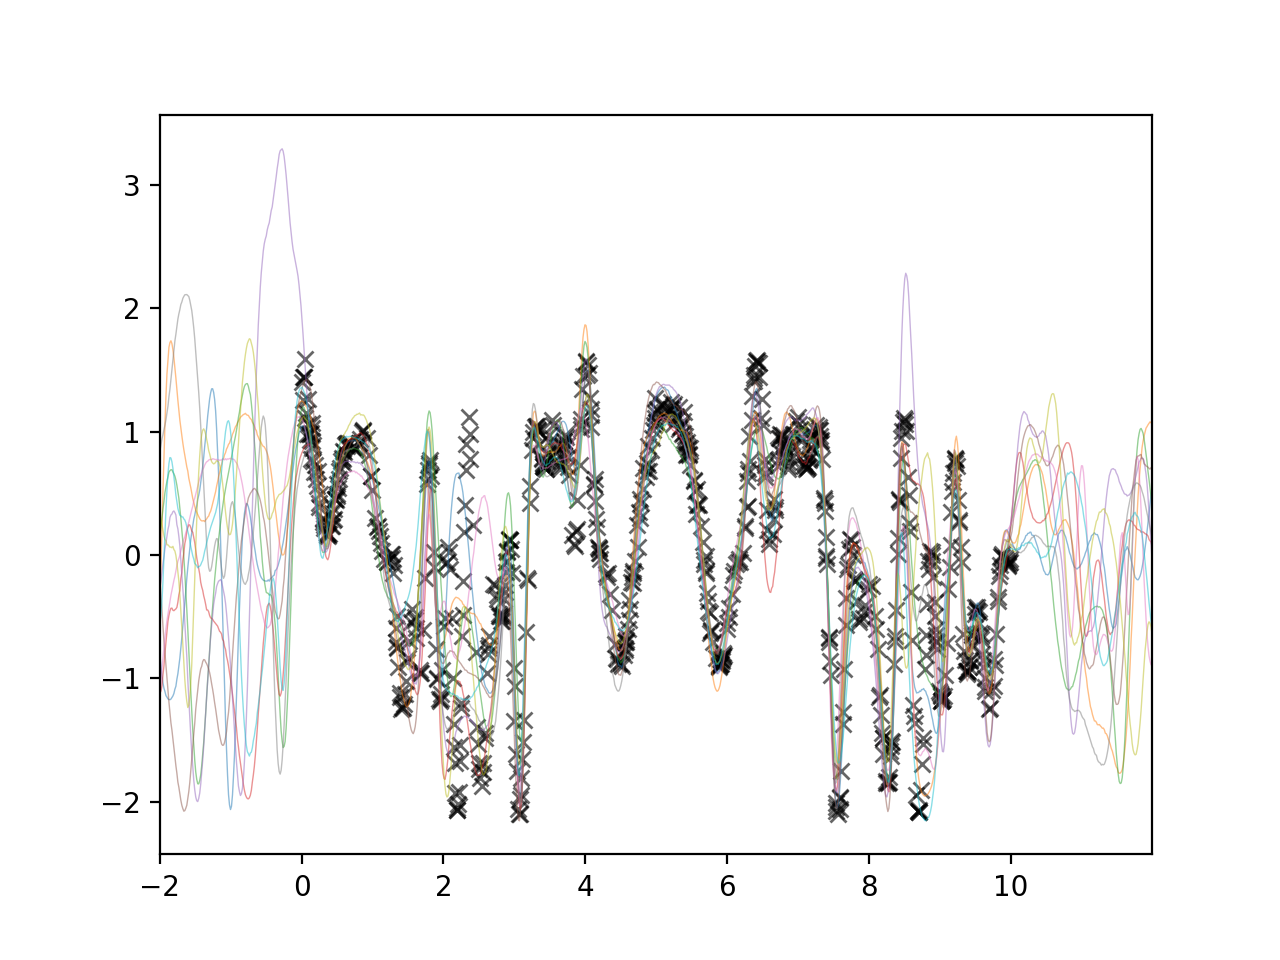

In [11]:
fig1 = DGP_figures(model, config_dict).plot()
fig2 = DGP_figures(model, config_dict).plot_sample()

### Hidden Layer

<IPython.core.display.Javascript object>


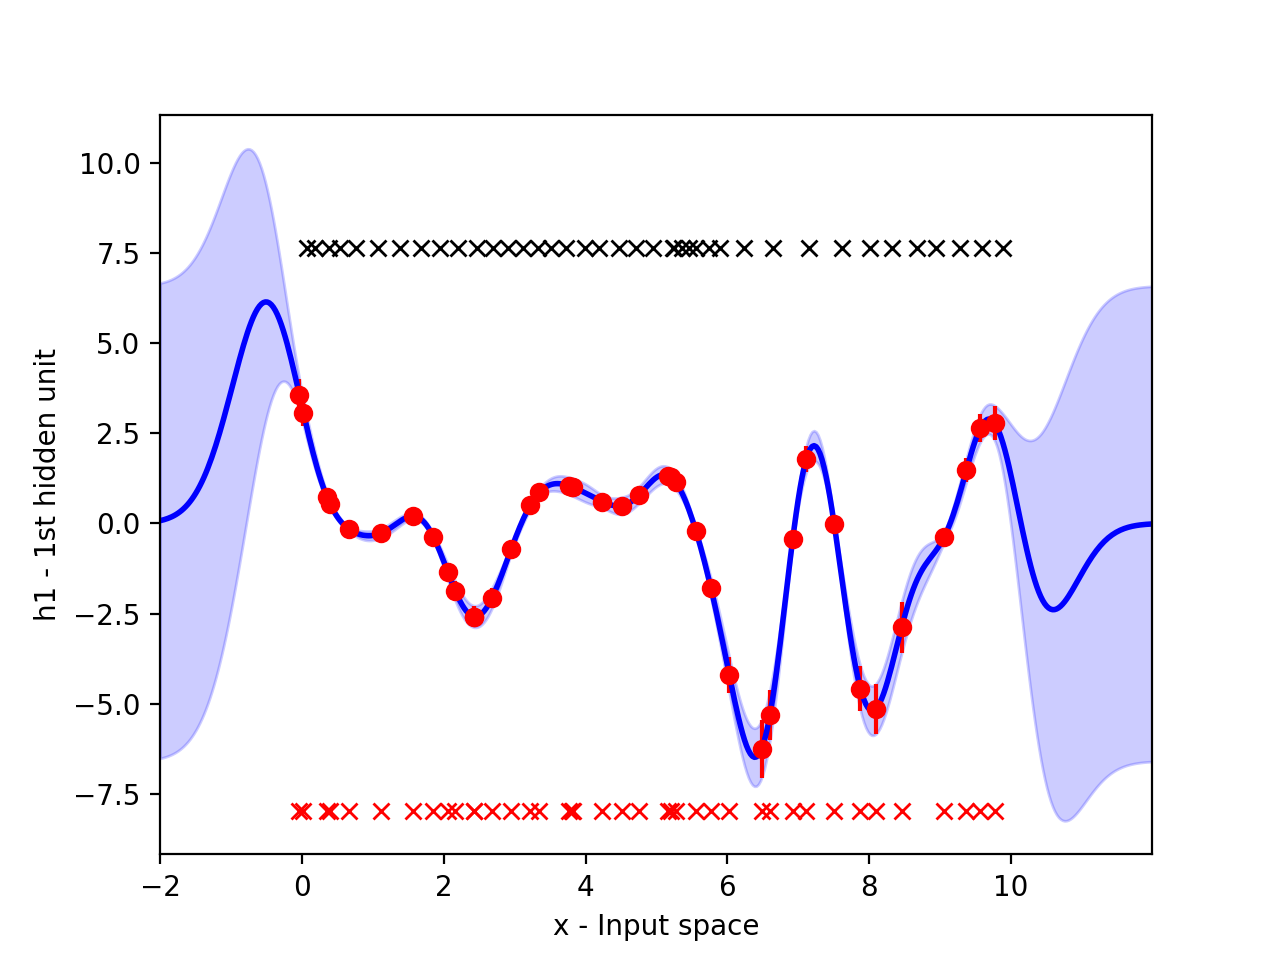

<IPython.core.display.Javascript object>


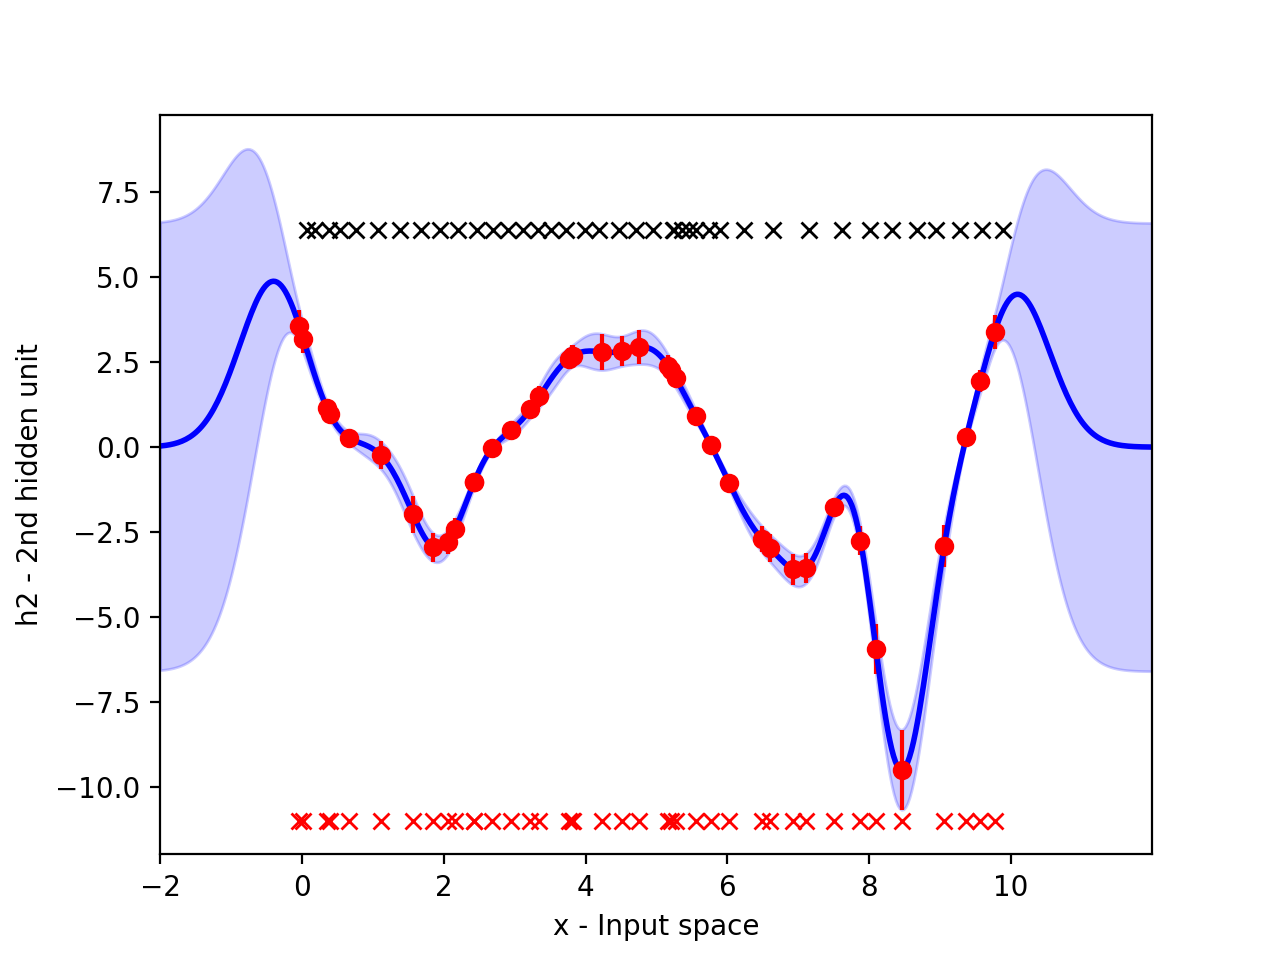

In [11]:
fig3 = DGP_figures(model, conf_dict=config_dict).plot_in_h()

<IPython.core.display.Javascript object>


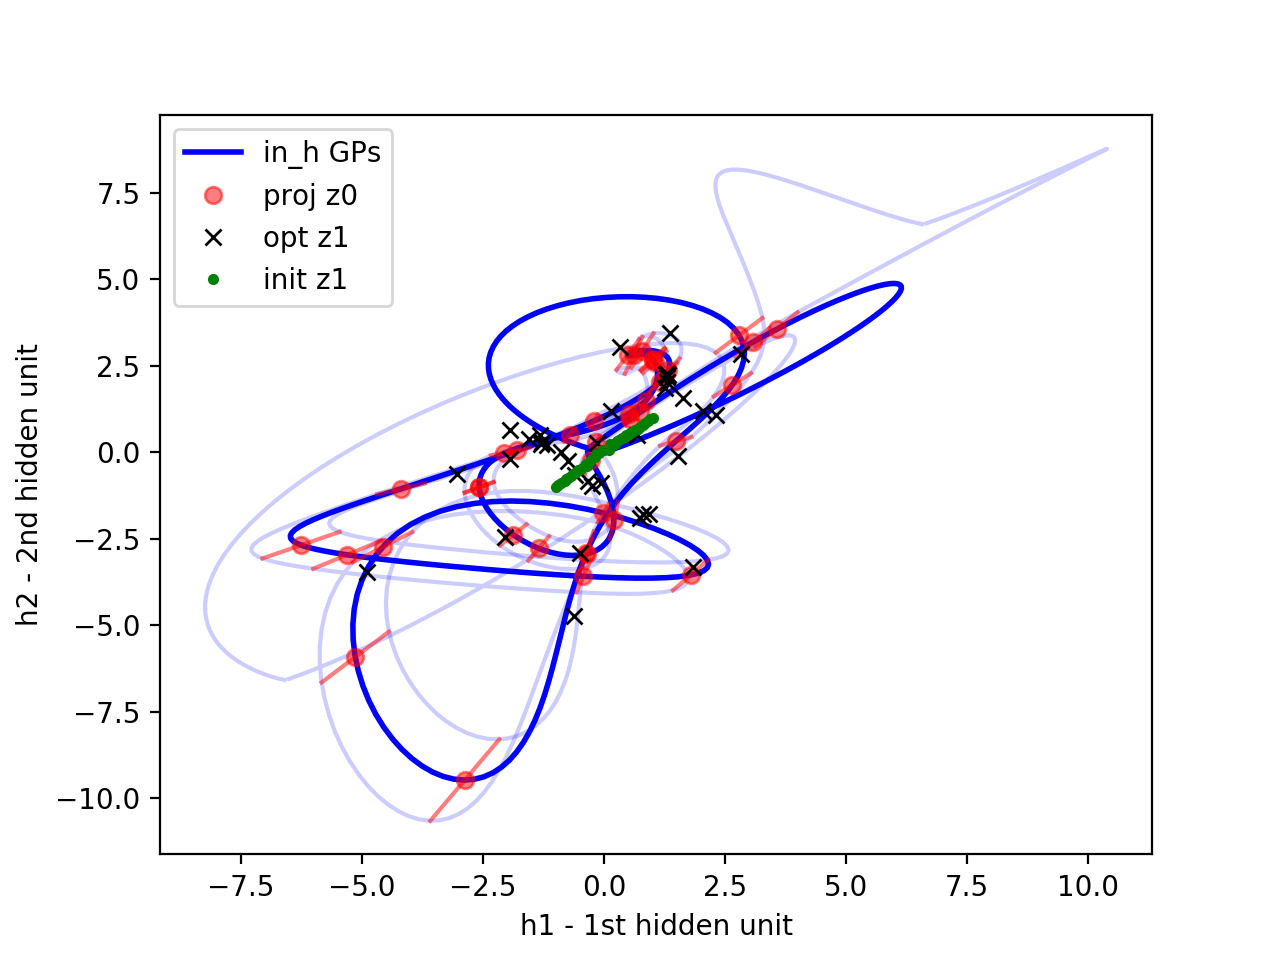

In [12]:
fig4 = DGP_figures(model, conf_dict=config_dict).plot_hidden()

<IPython.core.display.Javascript object>


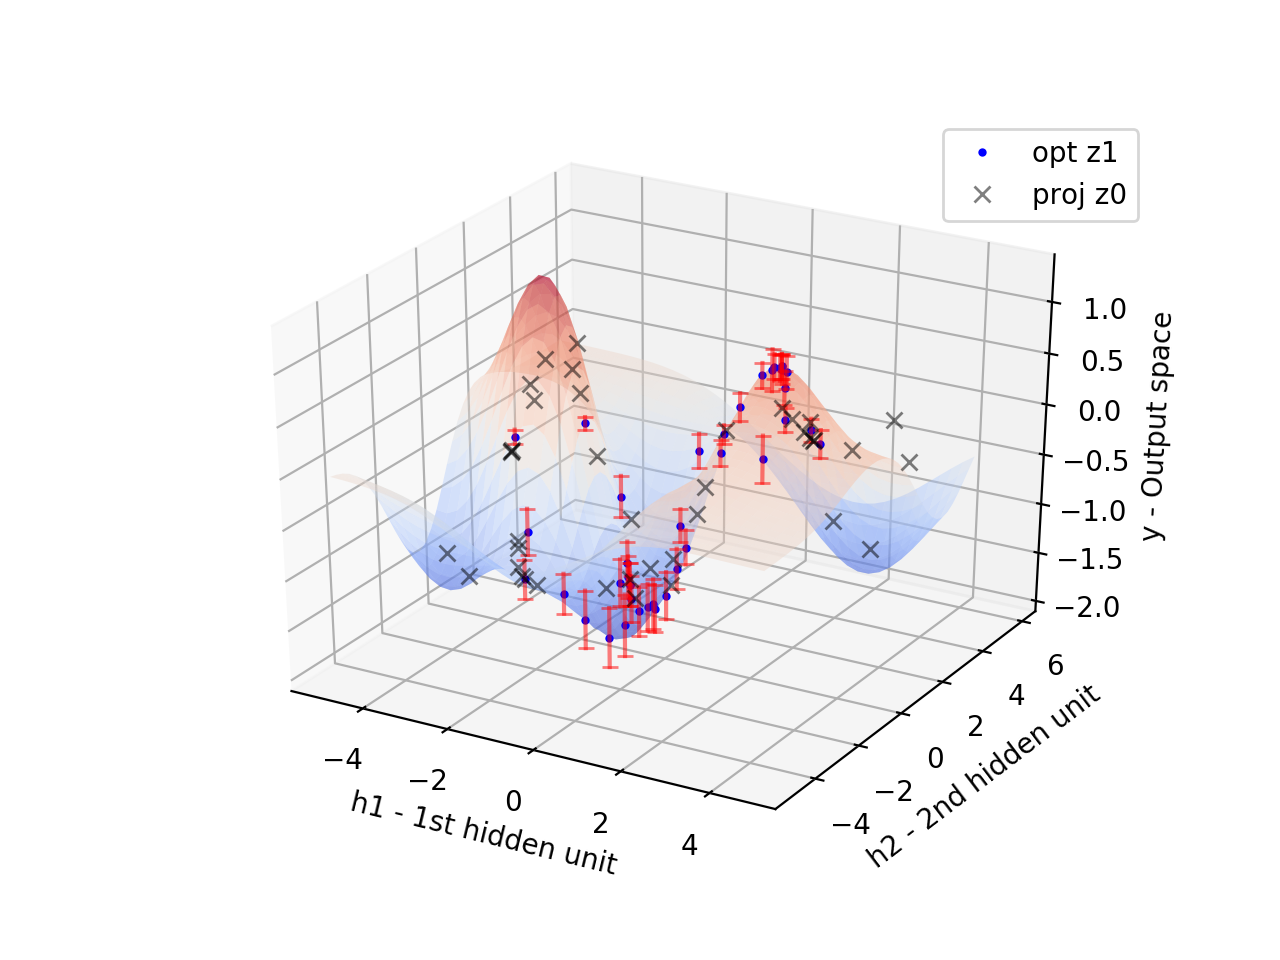

In [54]:
fig5 = DGP_figures(model, conf_dict=config_dict).plot_h_out()

### Initialisations

<IPython.core.display.Javascript object>


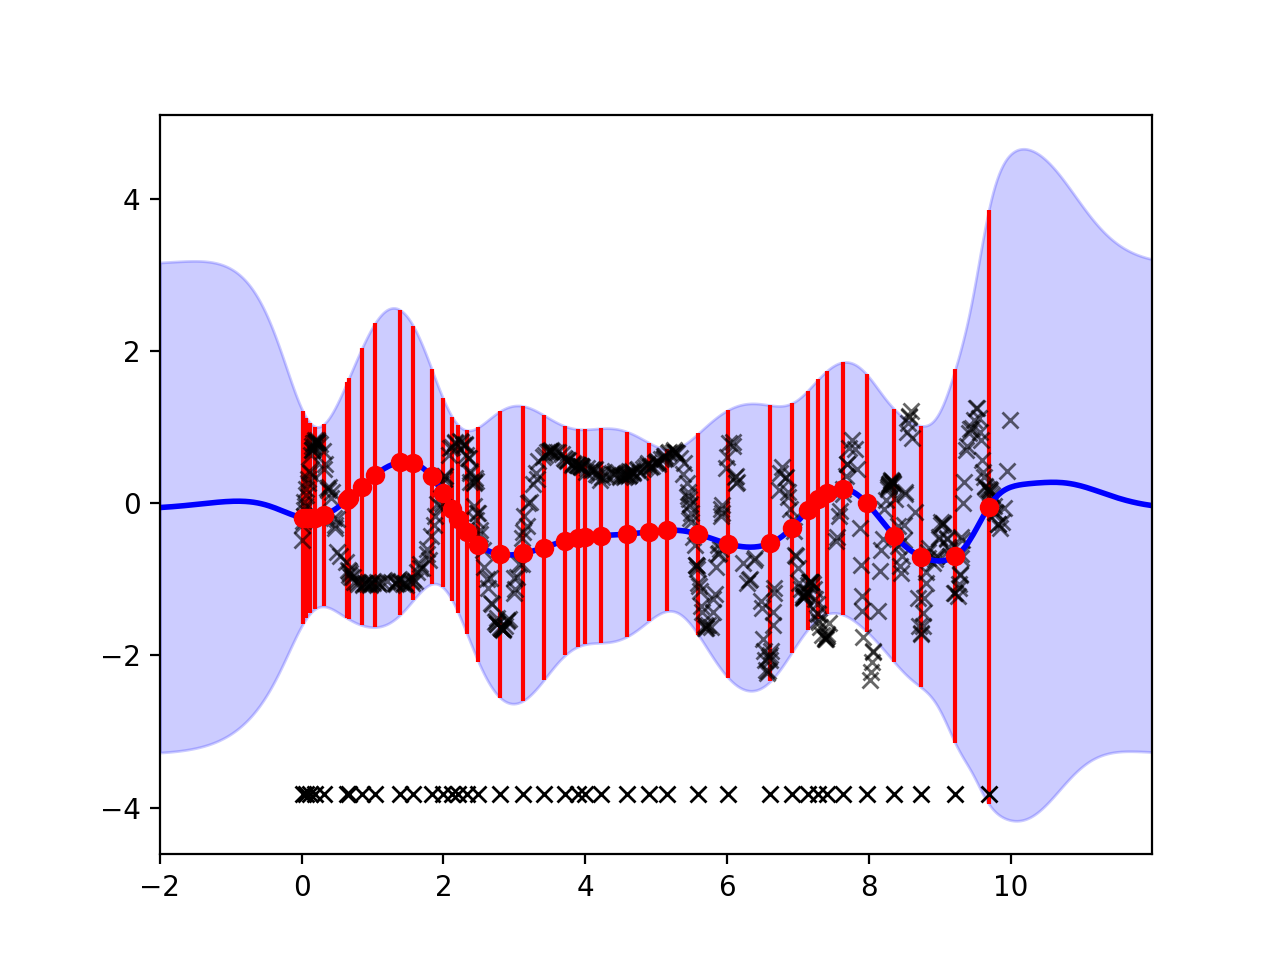

In [55]:
fig6 = DGP_figures(model, conf_dict=config_dict).plot_init()